In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import sklearn.datasets as dta
from sklearn import datasets
import requests
import os

In [66]:
Chicago_Building_Benchmark = "Data\\Chicago_Energy_Benchmarking.csv"
Chicago_Population = "Data\\Chicago_Population_Counts_2018.csv"
Energy_Usage = "Data\\Energy_Usage_2010.csv"
Illinois_Pop = "Data\\illinois_county_data.csv"

In [67]:
Chicago_Population

'Data\\Chicago_Population_Counts_2018.csv'

In [68]:
building_benchmark_df = pd.read_csv(Chicago_Building_Benchmark)
chicago_pop_df = pd.read_csv(Chicago_Population)
energy_usage_df = pd.read_csv(Energy_Usage)
illinois_pop_df = pd.read_csv(Illinois_Pop)

In [69]:
energy_usage_df.fillna(0, inplace=True)
energy_usage_df.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703160e+14,Residential,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703170e+14,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703130e+14,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703130e+14,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [70]:
energy_usage_df.count()

COMMUNITY AREA NAME                   67051
CENSUS BLOCK                          67051
BUILDING TYPE                         67051
BUILDING_SUBTYPE                      67051
KWH JANUARY 2010                      67051
                                      ...  
OCCUPIED UNITS                        67051
OCCUPIED UNITS PERCENTAGE             67051
RENTER-OCCUPIED HOUSING UNITS         67051
RENTER-OCCUPIED HOUSING PERCENTAGE    67051
OCCUPIED HOUSING UNITS                67051
Length: 73, dtype: int64

In [71]:
winter_kwh = energy_usage_df['KWH JANUARY 2010'] + energy_usage_df['KWH FEBRUARY 2010'] + energy_usage_df['KWH DECEMBER 2010']
spring_kwh = energy_usage_df['KWH MARCH 2010'] + energy_usage_df['KWH APRIL 2010'] + energy_usage_df['KWH MAY 2010']
summer_kwh = energy_usage_df['KWH JUNE 2010'] + energy_usage_df['KWH JULY 2010'] + energy_usage_df['KWH AUGUST 2010']
fall_kwh = energy_usage_df['KWH SEPTEMBER 2010'] + energy_usage_df['KWH OCTOBER 2010'] + energy_usage_df['KWH NOVEMBER 2010']
energy_usage_df["spring_electricity"] = spring_kwh
energy_usage_df["winter_electricity"] = winter_kwh
energy_usage_df["summer_electricity"] = summer_kwh
energy_usage_df["fall_electricity"] = fall_kwh
winter_therm = energy_usage_df['THERM JANUARY 2010'] + energy_usage_df['THERM FEBRUARY 2010'] + energy_usage_df['THERM DECEMBER 2010']
spring_therm = energy_usage_df['THERM MARCH 2010'] + energy_usage_df['TERM APRIL 2010'] + energy_usage_df['THERM MAY 2010']
summer_therm = energy_usage_df['THERM JUNE 2010'] + energy_usage_df['THERM JULY 2010'] + energy_usage_df['THERM AUGUST 2010']
fall_therm = energy_usage_df['THERM SEPTEMBER 2010'] + energy_usage_df['THERM OCTOBER 2010'] + energy_usage_df['THERM NOVEMBER 2010']
energy_usage_df["spring_gas"] = spring_therm
energy_usage_df["winter_gas"] = winter_therm
energy_usage_df["summer_gas"] = summer_therm
energy_usage_df["fall_gas"] = fall_therm

In [72]:
energy_usage_df["winter_electricity"].sum()

3899397401.0

In [73]:
np.warnings.filterwarnings('ignore')

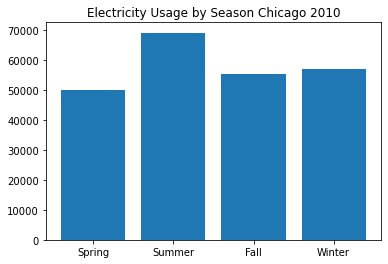

In [74]:
compare_df = energy_usage_df[(energy_usage_df["spring_electricity"] > 0) & (energy_usage_df["summer_electricity"] > 0) & (energy_usage_df["fall_electricity"] > 0) & (energy_usage_df["winter_electricity"] > 0) & (energy_usage_df["spring_gas"] > 0) & (energy_usage_df["summer_gas"] > 0) & (energy_usage_df["fall_gas"] > 0) & (energy_usage_df["winter_gas"] > 0)]

data = [compare_df["spring_electricity"].mean(), compare_df["summer_electricity"].mean(), compare_df["fall_electricity"].mean(), compare_df["winter_electricity"].mean()]
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
x_axis = seasons
plt.labels = seasons
plt.xlabel ="Season"
plt.ylabel = "Electricity Usage"
plt.bar(x_axis, data)
plt.title('Electricity Usage by Season Chicago 2010')

plt.show()
#compare_df["summer_electricity"].max()

Text(0.5, 1.0, 'Gas Usage by Season Chicago 2010')

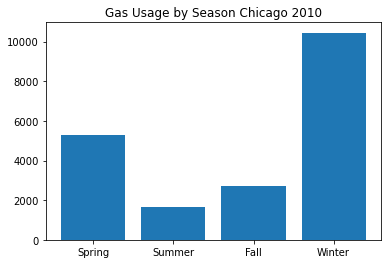

In [75]:
data = [compare_df["spring_gas"].mean(), compare_df["summer_gas"].mean(), compare_df["fall_gas"].mean(), compare_df["winter_gas"].mean()]
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
x_axis = seasons
plt.labels = seasons
plt.xlabel ="Season"
plt.ylabel = "Gas Usage"
plt.bar(x_axis, data)
plt.title('Gas Usage by Season Chicago 2010')

In [76]:
chicago_pop_df.head()

,Geography Type,Year,Geography,COMMUNITY AREA NAME,Population - Total
0,Citywide,2018,Chicago,Chicago,2705988
1,ZIP Code,2018,60601,The Loop,14675
2,ZIP Code,2018,60602,The Loop,1244
3,ZIP Code,2018,60603,The Loop,1174
4,ZIP Code,2018,60604,The Loop,782


In [77]:
neighborhood_grouping = chicago_pop_df.groupby(['COMMUNITY AREA NAME'])
#neighborhood_energy_grouping = compare_df.groupby(['COMMUNITY AREA NAME'])
chicago_neighborhood_populations = neighborhood_grouping.sum()
pop_energy_df = pd.merge(compare_df, chicago_neighborhood_populations, on="COMMUNITY AREA NAME", how="left")
pop_energy_df.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,spring_electricity,winter_electricity,summer_electricity,fall_electricity,spring_gas,winter_gas,summer_gas,fall_gas,Year,Population - Total
0,Lakeview,1.703110e+14,Residential,Multi 7+,1526.0,1665.0,1824.0,1579.0,2916.0,4211.0,...,6319.0,8863.0,15969.0,10511.0,4575.0,7731.0,1040.0,1451.0,2018.0,70052.0
1,Lincoln Park,1.703110e+14,Residential,Multi 7+,242.0,136.0,134.0,134.0,144.0,122.0,...,412.0,2998.0,5175.0,7080.0,1149.0,2834.0,321.0,476.0,4036.0,110327.0
2,Logan Square,1.703180e+14,Commercial,Commercial,6171.0,3593.0,3812.0,4376.0,4431.0,5945.0,...,12619.0,17187.0,25692.0,12976.0,1991.0,2421.0,278.0,797.0,4036.0,140302.0
3,Near North Side,1.703110e+14,Residential,Multi < 7,1959.0,2039.0,1647.0,1504.0,1790.0,3340.0,...,4941.0,7534.0,12084.0,7870.0,1127.0,2711.0,173.0,290.0,4036.0,51561.0
4,Roseland,1.703150e+14,Commercial,Commercial,4446.0,4657.0,4905.0,5637.0,8518.0,10478.0,...,19060.0,24025.0,18561.0,30892.0,6734.0,10053.0,4974.0,4564.0,2018.0,66724.0


In [95]:
neighborhood_energy_grouping = pop_energy_df.groupby(['COMMUNITY AREA NAME'])
neighborhoods = pd.unique(pop_energy_df["COMMUNITY AREA NAME"])

len(neighborhoods)

77

ValueError: x and y must be the same size

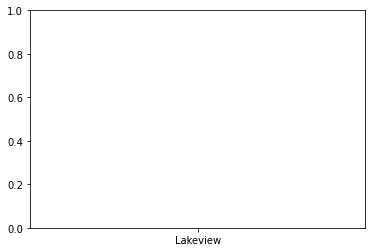

In [91]:
data = [neighborhood_energy_grouping["spring_gas"].sum(), neighborhood_energy_grouping["summer_gas"].sum(), neighborhood_energy_grouping["fall_gas"].sum(), neighborhood_energy_grouping["winter_gas"].sum()]
x_axis = neighborhoods
plt.labels = seasons
plt.xlabel ="Neighborhhods"
plt.ylabel = "Gas Usage"
plt.scatter(x_axis, data)
plt.title('Gas Usage by Neighborhood Chicago 2010')
plt.show()